In [5]:
import numpy as np
import matplotlib.pylab as plt

In [6]:
DARK_CURRENT = 0.15 #e/p/s
READ_NOISE = 9.3 #e

In [19]:
data = {
    "star1":{
        "exposure_time": [10,20,30,40,50,60,70,80,90,100,150,180,210,270,400,500,600], #s
        "n_pixel":       [79,77,80,80,79,79,79,81,78,78,79,76,77,76,78,77,80],
        "S_source":     [1158.18,1350.53,1569.34,1771.17,1948.35,2196.33,2376.52,2590.6,2791.68,2171.62,3022.65,3726,5537.62,6300.18,8457.33,10953.1,13825], #ADU
        "n_pixel_Sky":  [392,400,393,393,393,393,390,393,393,391,392,394,392,393,393,391,395],
        "S_sky":        [1103.26,1257.32,1423.84,1588.45,1728.04,1920.1,2070.94,2238.1,2365.12,1683.33,2301.9,2880.03,4954.1,5191.11,6605.08,8546.26,11193.1] #ADU
    },
    "star2":{
        "exposure_time": [10,20,30,40,50,60,70,80,90,100,150,180,210,270,400,500,600], #s
        "n_pixel":       [78,78,80,79,79,80,79,80,81,79,80,78,80,79,77,79,79],
        "S_source":     [1161.4,1357.6,1582.96,1790.91,1988.06,2239.03,2439.8,2664.04,2830.93,2156.65,2990.31,3711.81,5779.19,6350.85,8588.81,11100.5,14211.1], #ADU
        "n_pixel_Sky":  [394,394,392,392,393,390,395,393,392,392,394,393,394,395,396,392,391],
        "S_sky":        [1111.1,1277.39,1461.23,1638.17,1787.21,2006,2150.84,2327.75,2472.64,1732.08,2365.66,3006.65,5345.78,5449.82,6994,9064.81,11782] #ADU
    },
        "star3":{
        "exposure_time": [10,20,30,40,50,60,70,80,90,100,150,180,210,270,400,500,600], #s
        "n_pixel":       [78,77,78,78,78,78,79,78,79,79,80,78,78,78,81,78,80],
        "S_source":     [1149.56,1338.65,1573.76,1790.24,1973.59,2217.01,2433.92,2636.32,2830.48,2147.11,3005.76,3732.08,5718.54,6271.29,8425,11124.2,13837.1], #ADU
        "n_pixel_Sky":  [390,392,394,392,393,393,393,395,390,392,392,393,397,392,391,395,392],
        "S_sky":        [1101.04,1259.89,1434.79,1606.12,1754.31,1956.36,2109.22,2284.47,2429.81,1694.6,2328.69,2951.93,5241,5243.37,5253.94,6777.68,8871.96,11320.4] #ADU
    },
        "star4":{
        "exposure_time": [10,20,30,40,50,60,70,80,90,100,150,180,210,270,400,500,600], #s
        "n_pixel":       [75,79,78,77,79,75,78,80,80,80,79,78,78,75,79,79,80],
        "S_source":     [1130.07,1310.2,1515.15,1716.52,1881.7,2114.21,2321.63,2484.43,2667.89,1980.11,2747.86,3439.73,5531.65,5868.8,7782.67,10218.1,12813.8], #ADU
        "n_pixel_Sky":  [391,393,392,392,394,391,391,392,393,392,393,394,393,394,392,391,391],
        "S_sky":        [1102.06,1258.68,1432.54,1604.49,1743.49,1952.19,2101.92,2269.86,2418.37,1696.05,2316.62,2956.24,5218.94,5215.2,6737.1,8825.48,11259.6] #ADU
    }
}

In [20]:
class Star:
    def __init__(self, exposure_time=None, n_pixel=None, S_source=None, n_pixel_sky=None, S_sky=None):
        self.exposure_time = exposure_time
        self.n_pixel = n_pixel 
        self.S_source = S_source
        self.n_pixel_sky = n_pixel_sky
        self.S_sky = S_sky
        self.name = ""

    def SNR(self):
        return self.S_source/np.sqrt(self.S_source + self.n_pixel*(1+(self.n_pixel/self.n_pixel_sky))*(self.S_sky + self.exposure_time*DARK_CURRENT + READ_NOISE**2))


class StarData():
    def __init__(self, name=""):
        self.name = name
        self.starInTime = []
        self.star = Star()

    def load(self, data):
        star_data =  data.get(self.name)
        for exposure_time, n_pixel, S_source, n_pixel_sky, S_sky in zip(star_data["exposure_time"], 
                                                                        star_data["n_pixel"], 
                                                                        star_data["S_source"], 
                                                                        star_data["n_pixel_Sky"], 
                                                                        star_data["S_sky"]):
            self.star = Star(exposure_time, n_pixel, S_source, n_pixel_sky, S_sky)
            self.starInTime.append(self.star)

In [21]:
SNR_dict = {}
for star_name in data.keys():
    starData = StarData(star_name)
    starData.load(data)
    list_of_snr = [ star.SNR() for star in  starData.starInTime]
    SNR_dict[star_name] = list_of_snr

In [22]:
SNR = np.mean((SNR_dict["star1"],SNR_dict["star2"],SNR_dict["star3"],SNR_dict["star4"]), axis=0)

In [23]:
SNR

array([ 3.43833932,  3.75486691,  4.07436334,  4.38942051,  4.63600941,
        4.97185845,  5.21023992,  5.40025103,  5.6307306 ,  5.07925845,
        6.05601427,  6.81109475,  7.95211235,  8.73398345, 10.54463252,
       12.15677288, 13.30747486])

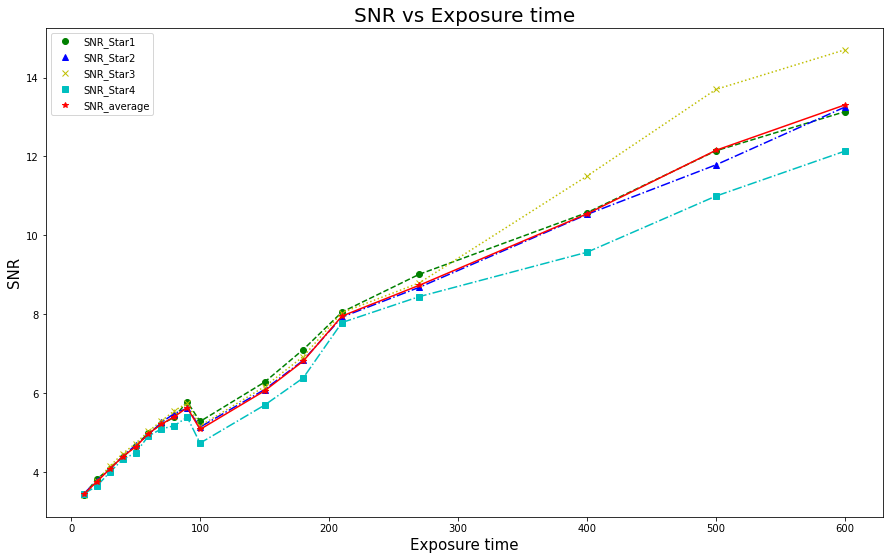

In [24]:
plt.figure(figsize = (15,9))
exposure_time = data["star1"]["exposure_time"]
plt.plot(exposure_time, SNR_dict["star1"], 'go', label='SNR_Star1')
plt.plot(exposure_time, SNR_dict["star1"], 'g--')
plt.plot(exposure_time, SNR_dict["star2"], 'b^', label='SNR_Star2')
plt.plot(exposure_time, SNR_dict["star2"], 'b-.')
plt.plot(exposure_time, SNR_dict["star3"], 'yx', label='SNR_Star3')
plt.plot(exposure_time, SNR_dict["star3"], 'y:')
plt.plot(exposure_time, SNR_dict["star4"], 'cs', label='SNR_Star4')
plt.plot(exposure_time, SNR_dict["star4"], 'c-.')
plt.plot(exposure_time, SNR, 'r*', label='SNR_average')
plt.plot(exposure_time, SNR, 'r-')
plt.title('SNR vs Exposure time', fontsize=20)
plt.xlabel('Exposure time', fontsize=15)
plt.ylabel('SNR', fontsize=15)
plt.legend()

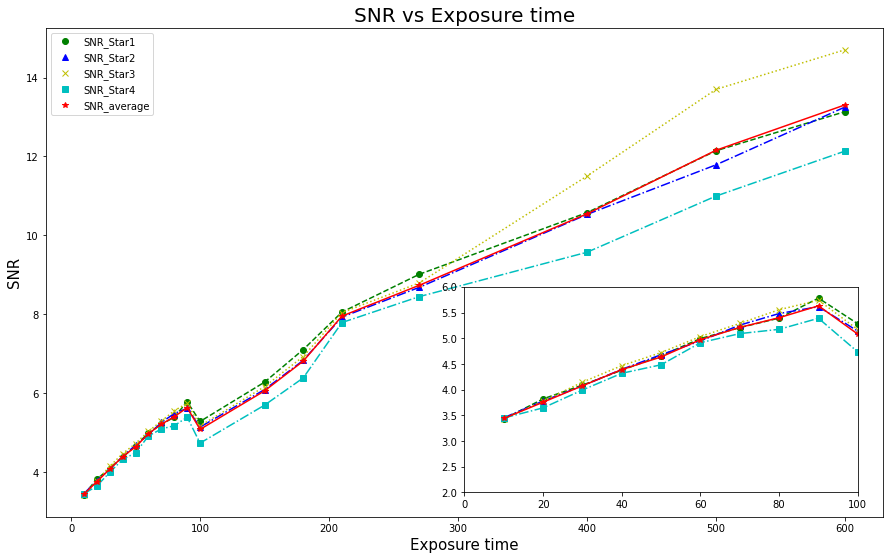

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

fig, ax1 = plt.subplots(figsize=(15,9))
plt.plot(exposure_time, SNR_dict["star1"], 'go', label='SNR_Star1')
plt.plot(exposure_time, SNR_dict["star1"], 'g--')
plt.plot(exposure_time, SNR_dict["star2"], 'b^', label='SNR_Star2')
plt.plot(exposure_time, SNR_dict["star2"], 'b-.')
plt.plot(exposure_time, SNR_dict["star3"], 'yx', label='SNR_Star3')
plt.plot(exposure_time, SNR_dict["star3"], 'y:')
plt.plot(exposure_time, SNR_dict["star4"], 'cs', label='SNR_Star4')
plt.plot(exposure_time, SNR_dict["star4"], 'c-.')
plt.plot(exposure_time, SNR, 'r*', label='SNR_average')
plt.plot(exposure_time, SNR, 'r-')
ax1.set_title('SNR vs Exposure time', fontsize=20)
ax1.set_xlabel('Exposure time', fontsize=15)
ax1.set_ylabel('SNR',fontsize=15)
ax1.legend(loc=2)

# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.5,0.05,0.47,0.42])
ax2.set_axes_locator(ip)


plt.plot(exposure_time, SNR_dict["star1"], 'go', label='SNR_Star1')
plt.plot(exposure_time, SNR_dict["star1"], 'g--')
plt.plot(exposure_time, SNR_dict["star2"], 'b^', label='SNR_Star2')
plt.plot(exposure_time, SNR_dict["star2"], 'b-.')
plt.plot(exposure_time, SNR_dict["star3"], 'yx', label='SNR_Star3')
plt.plot(exposure_time, SNR_dict["star3"], 'y:')
plt.plot(exposure_time, SNR_dict["star4"], 'cs', label='SNR_Star4')
plt.plot(exposure_time, SNR_dict["star4"], 'c-.')
plt.plot(exposure_time, SNR, 'r*', label='SNR_average')
plt.plot(exposure_time, SNR, 'r-')
ax2.set_xlim(0,100)
ax2.set_ylim(2,6)

plt.show()